<a href="https://colab.research.google.com/github/usadhana025/Hands_on_ml/blob/master/Notebooks/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/usadhana025/Hands_on_ml/refs/heads/master/players_22.csv"
players = pd.read_csv(url)
players.head()


<ipython-input-25-1a40cb334f2c>:4: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(url)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [26]:
features=["overall","potential","value_eur","wage_eur","age"]

In [27]:
players=players.dropna(subset=features)

In [28]:
data=players[features].copy()

In [29]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [30]:
data.sum().isna()

,0
overall,False
potential,False
value_eur,False
wage_eur,False
age,False


# **Implementing clustering algorithm on these features**


1.   Scale the data
2.   Initialize random centroid
3.   Label each data point
4.   Update the centroid
5.   Repeat 3&4




In [31]:
data=(data-data.min())/(data.max()-data.min())*9+1

In [32]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [33]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [36]:
def random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=data.apply(lambda x: float (x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [37]:
centroids=random_centroids(data,5)
centroids

<ipython-input-36-d64fbc2afd3e>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x: float (x.sample()))


,0,1,2,3,4
overall,6.673913,1.586957,5.695652,5.891304,5.108696
potential,6.869565,5.108696,5.500000,4.326087,7.065217
value_eur,1.022779,1.014660,1.045976,1.036698,1.083091
wage_eur,1.038627,1.373391,1.193133,1.038627,1.115880
age,6.333333,3.333333,2.666667,6.000000,4.333333


In [41]:
def get_labels(data,centroids):
  # np.sqrt(((data-centroids.iloc[:,0])**2).sum(axis=1)) #for centroid 0
  distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [43]:
labels=get_labels(data,centroids)
labels.value_counts()

,count
2,5957
3,5657
1,3639
4,2364
0,1548


In [50]:
def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [52]:
def plot_clusters(data,labels,centroids,iterations):
  pca=PCA(n_components=2)
  data_2D=pca.fit_transform(data)
  centroids_2D=pca.fit_transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'iteration{iterations}')
  plt.scatter(x=data_2D[:,0],y=data_2D[:,1],c=labels)
  plt.scatter(x=centroids_2D[:,0],y=centroids_2D[:,1])
  plt.show()

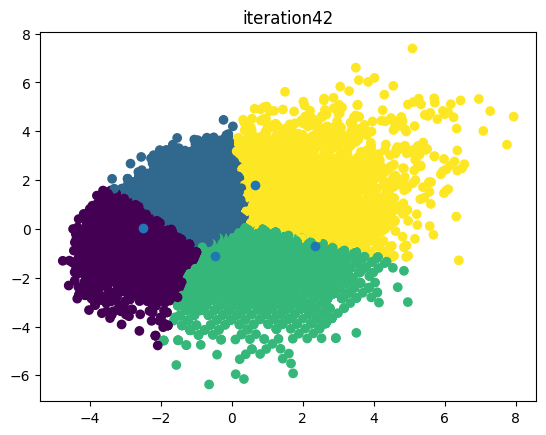

In [54]:
max_iteration=100
k=4
centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1
while iteration<max_iteration and not centroids.equals(old_centroids):
  old_centroids=centroids
  labels=get_labels(data,centroids)
  centroids=new_centroids(data,labels,k)
  plot_clusters(data,labels,centroids,iteration)
  iteration+=1


In [55]:
centroids

,0,1,2,3
overall,2.583541,4.311694,4.642364,6.405155
potential,4.283190,5.838660,4.369041,6.512406
value_eur,1.013460,1.062916,1.035494,1.369797
wage_eur,1.017366,1.074427,1.088135,1.614006
age,2.483590,2.700703,5.435779,4.445231


In [57]:
players[labels==1][["short_name"]+features]

,short_name,overall,potential,value_eur,wage_eur,age
2415,A. Aouchiche,74,82,9000000.0,9000.0,18
2866,Osvaldão Murilo,73,73,3100000.0,9000.0,21
2871,Nicolás Formido,73,73,3600000.0,16000.0,21
2877,Neviano Neves,73,73,3600000.0,17000.0,21
2884,Luis Couprins,73,73,3200000.0,9000.0,21
...,...,...,...,...,...,...
18124,M. Løvik,55,76,375000.0,500.0,17
18125,J. Hernández,55,77,400000.0,500.0,17
18227,K. Urbański,54,79,350000.0,550.0,16
18311,S. Denham,54,77,325000.0,500.0,18


In [58]:
from sklearn.cluster import KMeans

In [62]:
kmeans=KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [63]:
centroids=kmeans.cluster_centers_

In [64]:
pd.DataFrame(centroids,columns=features)

,overall,potential,value_eur,wage_eur,age
0,4.764441,4.470638,1.038083,1.102216,5.575125
1,4.775243,6.092642,1.089325,1.127613,2.989522
2,6.724693,6.701511,1.570530,1.919494,4.876314
3,2.981141,4.626956,1.017860,1.020753,2.654497
